In [41]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [42]:
dados = pd.read_csv('variaveis_apropriadas.csv')
dados

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
3,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,6,0,27.482192,4.024658,1,0,1,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,16644,1,34.857534,3.101370,1,1,1,0,1.0,True,...,1,0,0,1,0,1,0,0,0,0
6766,16645,0,54.109589,9.884932,1,0,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
6767,16646,0,43.389041,7.380822,1,1,1,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0
6768,16647,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0


# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [43]:
# Vamos localizar onde está a coluna 'mau' pois ela é a nossa coluna de interesse. Ou seja, o nosso 'y'
dados.columns

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

Precisamos definir o nosso X e o nosso y para separar a base em porcentagens. Para o X vamospegar todas as linhase todas as colunas, menos a coluna 'mau'. Ela será o nosso y.

Nesse caso a nossa coluna de interesse ('mau') é a nona

In [44]:
# Separar a variável resposta
y = dados['mau']

# Separar as variáveis explicativas
X = dados.drop('mau', axis=1)

# Dividir em treinamento e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

**Passo 1:** Definir um objeto com a função da árvore de decisão

In [45]:
arvore = DecisionTreeClassifier()
arvore

DecisionTreeClassifier()

**Passo 2:** Treinar o modelo com os dados de treinamento

In [46]:
arvore.fit(X_train, y_train)
arvore

DecisionTreeClassifier()

**Passo 3:** Vizualização da Árvore

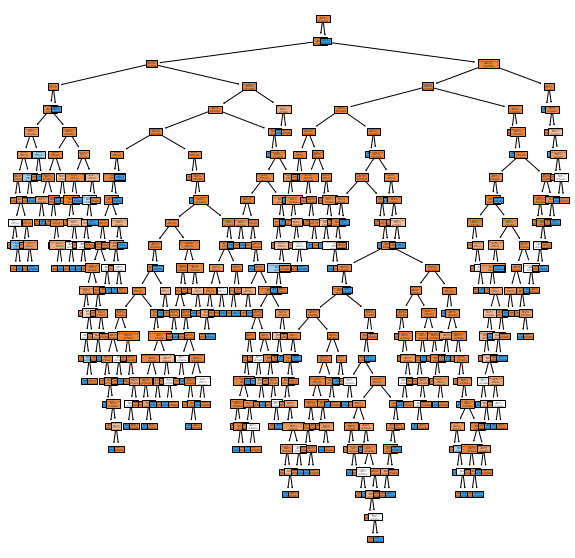

In [47]:
plt.figure(figsize=(10,10))
plot_tree(arvore, feature_names=X.columns.tolist(), class_names=['aprovados', 'reprovados'], filled=True)
plt.show()

**Passo 4:** Produzir uma visualização da matriz de classificação (ou matriz de confusão) - colocando os rótulos como "aprovados" e "reprovados"

C:\Users\hudle\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


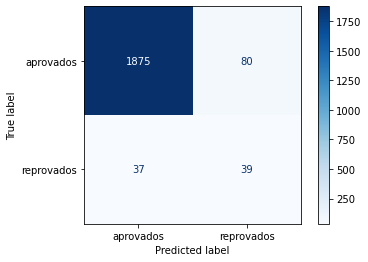

In [48]:
# Plotando a matriz de confusão
cm = plot_confusion_matrix(arvore, X_test, y_test, display_labels=['aprovados', 'reprovados'], cmap=plt.cm.Blues)

# Mostrando a visualização
plt.show()

**Passo 5:** Calcular a acurácia na base de **treinamento**

In [49]:
y_pred = arvore.predict(X_train) # Fazer as previsões na base de treinamento
acuracia = accuracy_score(y_train, y_pred) # Calcular a acurácia comparando as previsões com os valores reais
print(f"A acurácia na base de treinamento foi de {acuracia:.2f}")

A acurácia na base de treinamento foi de 1.00


**Observação super importante!**

Se tivéssemos somente este resultado, poderiamos dizer tranquilamente que nosso modelo, muito provavelmente, estava com um overfitting já que tivamos 1.00 ou 100% de acurácia. O modelo estava muito bem para os dados de nossa base, mas provavelmente não se sairá bem para outra base. **Vamos testar isso nos próximos passos**

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

**Passo 1** - Classifique a base de teste de acordo com a árvore que você treinou no item 2.

In [50]:
# Isso vai criar uma variável chamada y_pred_test que contém as previsões da árvore para a base de teste. 
# Você pode comparar essas previsões com os valores reais da variável resposta y_test para avaliar o desempenho da árvore

y_pred_test = arvore.predict(X_test)



**Passo 2** - Produza a visualização da matriz de confusão para a base de teste

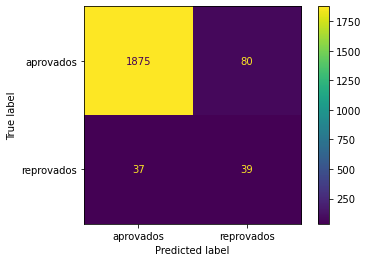

In [51]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test) 
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["aprovados", "reprovados"]).plot() 

# Gerar o gráfico
plt.show()

**Passo 3** - Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [52]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia da base de teste
acuracia_test = accuracy_score(y_test, y_pred_test) # Calcular a acurácia da base de teste

print(acuracia_test)


# Para a base de treinamento é o mesmo somente mudando alguns parâmetros
# Fazer as previsões na base de treinamento
y_pred_train = arvore.predict(X_train) 

# Calcular a acurácia da base de treinamento
acuracia_train = accuracy_score(y_train, y_pred_train)

print(acuracia_train) 


0.9423929098966026
1.0


#### Observação! Uma acurácia tão grande quer dizer que meu modelo acertou quase todas as previsões

**Passo 4** - Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?.

In [53]:
# Para treinar uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10
# Criando a nova árvore
nova_arvore = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123) 


# Vamos treinar a árvore
nova_arvore.fit(X_train, y_train)


# Vamos treinar uma nova árvore com os parâmetros especificados. usamos
# as previsões na base de teste, porém, usamos a nova árvore e depois usamos a função classification_report 
# Para receber como argumentos os valores reais e as previsões da variável resposta. 

from sklearn.metrics import classification_report

# Fazer as previsões na base de teste
y_pred_nova = nova_arvore.predict(X_test)

# Gerar o relatório de classificação
relatorio = classification_report(y_test, y_pred_nova)

print(relatorio)

# Para observar a distribuição da predição,vamos usar a função value_counts, que recebe como argumento uma série de dados 
# e retorna a contagem de cada valor único. 

# Calcular a distribuição da predição
distribuicao = pd.Series(y_pred_nova).value_counts()

print(distribuicao) 

# Isso deve mostrar quantos foram classificados como ‘bons’ e quantos foram classificados como ‘maus’. 
# Podemos calcular a proporção de  classificados como ‘maus’ dividindo o número de previsões ‘maus’ pelo número total de previsões

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      1955
        True       0.95      0.51      0.67        76

    accuracy                           0.98      2031
   macro avg       0.97      0.76      0.83      2031
weighted avg       0.98      0.98      0.98      2031

False    1990
True       41
dtype: int64


**Passo 5** - Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [54]:
# Criar um array com todos os valores 'bom'
y_pred_todos_bons = np.repeat('bom', len(y_test))

# Calcular a acurácia entre esse array e o y_test
acuracia_todos_bons = accuracy_score(y_test, y_pred_todos_bons)

# Mostrar o valor da acurácia
print(acuracia_todos_bons)

# Comparar com a acurácia do seu modelo
print(acuracia_test)


0.0
0.9423929098966026


C:\Users\hudle\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
